In [1]:
import numpy as np
import pandas as pd

In [2]:
notes = pd.read_csv("ALA.csv")
notes

,Note,Octave,Frequency(Hz),log(Frequency)
0,C3,3,130.81,7.031329
1,C#3,3,138.59,7.114679
2,D3,3,146.83,7.198003
3,D#3,3,155.56,7.281327
4,E3,3,164.81,7.364660
5,F3,3,174.61,7.447992
6,F#3,3,185.00,7.531381
7,G3,3,196.00,7.614710
8,G#3,3,207.65,7.698010
9,A3,3,220.00,7.781360


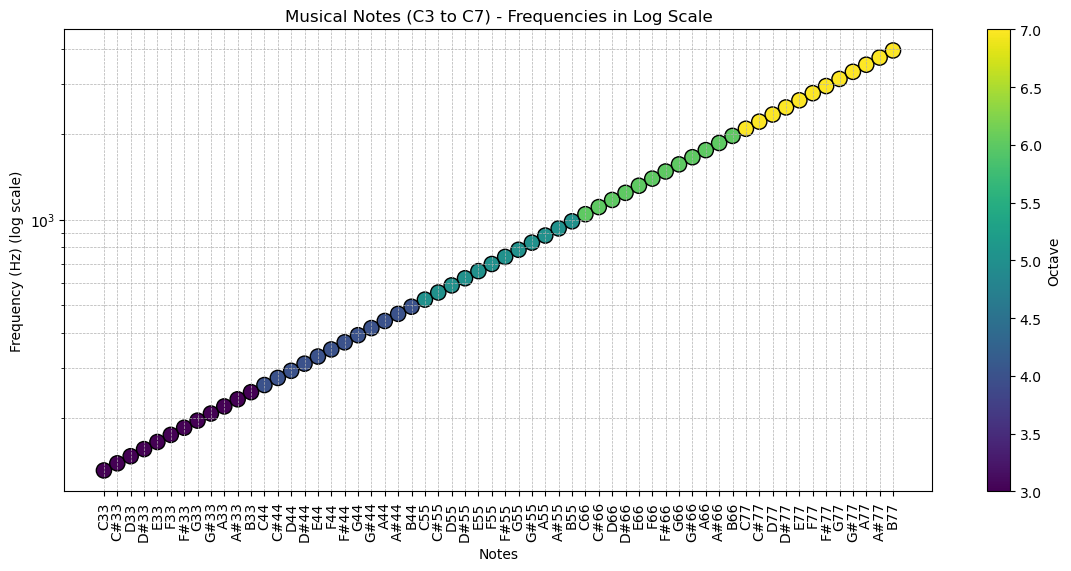

In [3]:
import matplotlib.pyplot as plt

# Extract data
x = np.arange(len(notes))  # one index per note
y = notes["Frequency(Hz)"]
octaves = notes["Octave"]

# Plot
plt.figure(figsize=(14,6))
plt.scatter(x, y, c=octaves, cmap="viridis", s=120, edgecolors="black")

# Labels and aesthetics
plt.xticks(x, notes["Note"] + notes["Octave"].astype(str), rotation=90)
plt.yscale("log")  # log scale helps view musical spacing clearly

plt.title("Musical Notes (C3 to C7) - Frequencies in Log Scale")
plt.xlabel("Notes")
plt.ylabel("Frequency (Hz) (log scale)")
plt.colorbar(label="Octave")
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


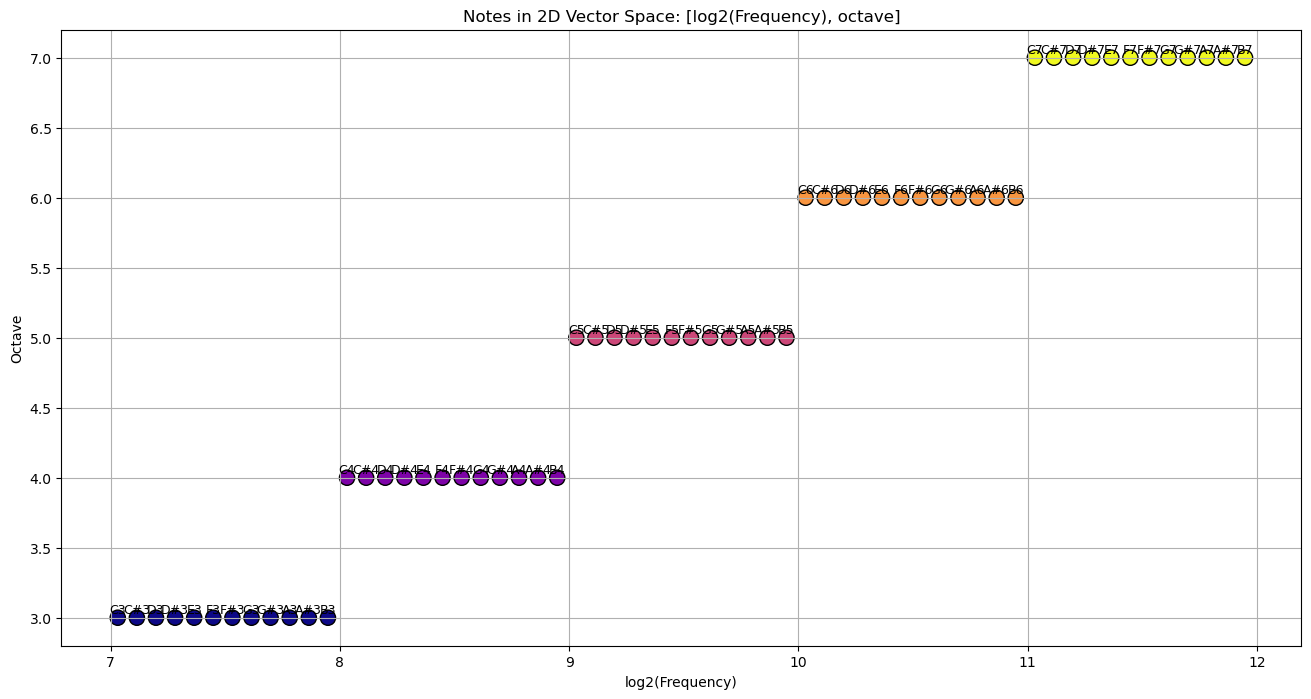

In [4]:
plt.figure(figsize=(16,8))
plt.scatter(notes["log(Frequency)"], notes["Octave"], c=notes["Octave"], cmap="plasma", s=120, edgecolors="black")

for i, row in notes.iterrows():
    plt.text(row["log(Frequency)"], row["Octave"] + 0.03, row["Note"], fontsize=9, ha="center")

plt.title("Notes in 2D Vector Space: [log2(Frequency), octave]")
plt.xlabel("log2(Frequency)")
plt.ylabel("Octave")
plt.grid(True)
plt.show()


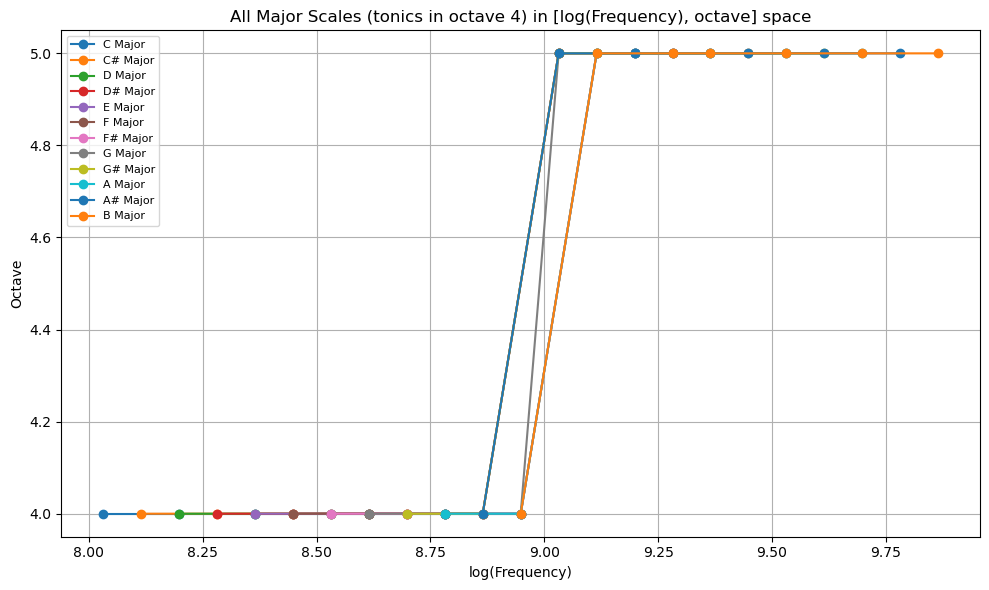

In [5]:
# assuming your combined column is called "Note"
notes["NoteName"] = notes["Note"].str.extract(r'^([A-G]#?)')   # C, C#, D, ...
notes["Octave"]   = notes["Note"].str.extract(r'(-?\d+)$').astype(int)

# ---- 2. Make sure we have a frequency column and log(Frequency) ----

# adjust this if your column name is slightly different
freq_col = None
if "Frequency(Hz)" in notes.columns:
    freq_col = "Frequency(Hz)"
elif "Frequency" in notes.columns:
    freq_col = "Frequency"
else:
    raise ValueError("Could not find a frequency column. Expected 'Frequency(Hz)' or 'Frequency'.")

if "log(Frequency)" not in notes.columns:
    notes["log(Frequency)"] = np.log(notes[freq_col])

# ---- 3. Pitch class mapping (0–11) based on NoteName ----

pc_map = {
    "C": 0, "C#": 1, "D": 2, "D#": 3,
    "E": 4, "F": 5, "F#": 6, "G": 7,
    "G#": 8, "A": 9, "A#": 10, "B": 11
}

notes["PitchClass"] = notes["NoteName"].map(pc_map)

# ---- 4. Major scale pattern and tonics ----

major_pattern = [0, 2, 4, 5, 7, 9, 11]   # in semitones from tonic
base_octave = 4                          # you can change this if you want
tonics = ["C", "C#", "D", "D#", "E", "F",
          "F#", "G", "G#", "A", "A#", "B"]

# ---- 5. Plot all major scales in [log(Frequency), octave] space ----

plt.figure(figsize=(10, 6))
any_plotted = False

for tonic in tonics:
    tonic_pc = pc_map[tonic]

    # find tonic note in chosen base octave
    tonic_rows = notes[(notes["NoteName"] == tonic) & (notes["Octave"] == base_octave)]
    if tonic_rows.empty:
        continue

    scale_rows = []

    for step in major_pattern:
        total_pc = tonic_pc + step
        pc = total_pc % 12
        octave_offset = total_pc // 12
        target_octave = base_octave + octave_offset

        row = notes[(notes["PitchClass"] == pc) &
                    (notes["Octave"] == target_octave)]
        if not row.empty:
            scale_rows.append(row.iloc[0])

    if not scale_rows:
        continue

    x_vals = [row["log(Frequency)"] for row in scale_rows]
    y_vals = [row["Octave"] for row in scale_rows]

    plt.plot(x_vals, y_vals, marker="o", label=f"{tonic} Major")
    any_plotted = True

plt.xlabel("log(Frequency)")
plt.ylabel("Octave")
plt.title(f"All Major Scales (tonics in octave {base_octave}) in [log(Frequency), octave] space")
plt.grid(True)

if any_plotted:
    plt.legend(loc="best", fontsize=8)

plt.tight_layout()
plt.show()

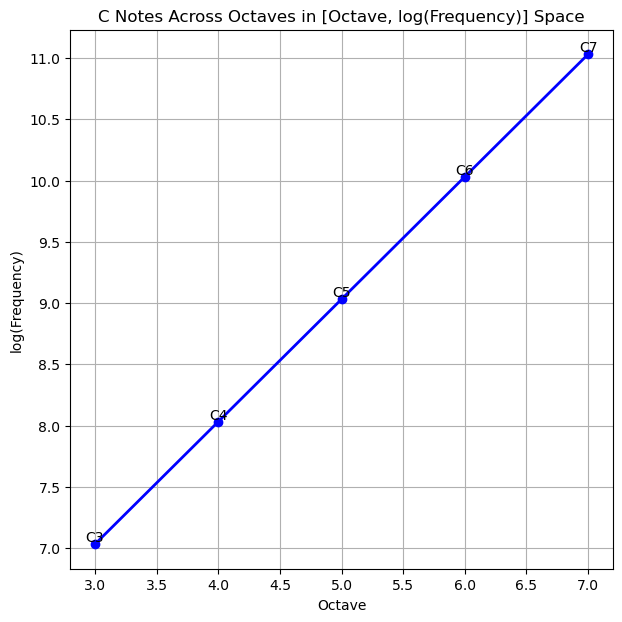

In [6]:
c_notes = notes[notes["NoteName"] == "C"].sort_values(by="Octave")

# Extract X and Y
x_vals = c_notes["Octave"]
y_vals = c_notes["log(Frequency)"]

# Plot
plt.figure(figsize=(7,7))
plt.plot(x_vals, y_vals, marker="o", linestyle="-", color="blue", linewidth=2)

# Annotate points with note label
for i, row in c_notes.iterrows():
    plt.text(row["Octave"], row["log(Frequency)"]+0.02, f"C{row['Octave']}", ha='center')

# Labels
plt.title("C Notes Across Octaves in [Octave, log(Frequency)] Space")
plt.xlabel("Octave")
plt.ylabel("log(Frequency)")
plt.grid(True)

plt.show()

# C–Notes and a 1D Vector Space in ℝ² (Absolute Version)

We work in the plane **ℝ²** with coordinates:

- first coordinate: octave number (a real number, typically an integer),
- second coordinate: logarithm of frequency, `log(frequency)`.

So any point representing a note is a vector

$$
(o, \log f) \in \mathbb{R}^2.
$$

Here `log` can be any fixed base (natural log, log₂, etc.); the choice does not affect linearity.

---

## 1. Absolute Formula for C–Note Frequencies

In equal–tempered tuning, going **up by one octave** always multiplies the frequency by 2.

So if a C note in octave \(o\) has frequency \(f_C(o)\), then for any integer \(o\):

$$
f_C(o + 1) = 2 \cdot f_C(o).
$$

By iterating this:

- For any two octaves \(o_1, o_2\),  
  the frequencies satisfy

$$
f_C(o_2) = f_C(o_1) \cdot 2^{\,o_2 - o_1}.
$$

This is purely **absolute**: it is a property of the tuning system, not of any chosen reference.

---

## 2. Absolute Relation in Log Space

Take the logarithm on both sides:

$$
\log f_C(o_2) = \log f_C(o_1) + (o_2 - o_1)\log 2.
$$

Rearrange:

$$
\log f_C(o_2) - \log f_C(o_1) = (o_2 - o_1)\log 2.
$$

Now look at the corresponding vectors in ℝ²:

- vector for C in octave $$\(o_1\): \((o_1, \log f_C(o_1))\)$$,
- vector for C in octave $$\(o_2\): \((o_2, \log f_C(o_2))\)$$.

Their **difference** is

$$
(o_2, \log f_C(o_2)) - (o_1, \log f_C(o_1))
= (o_2 - o_1, \log f_C(o_2) - \log f_C(o_1)).
$$

Using the relation above:

$$
(o_2 - o_1, \log f_C(o_2) - \log f_C(o_1))
= (o_2 - o_1, (o_2 - o_1)\log 2)
= (o_2 - o_1)\,(1, \log 2).
$$

This is a **purely absolute statement**:

> The difference of any two C–note vectors in \((\text{octave}, \log(\text{frequency}))\) space is always a real scalar multiple of the fixed vector \((1, \log 2)\).

No special reference octave is needed.

---

## 3. The C–Note Direction Space

Consider the set

$$
V_C := \{\, t(1, \log 2) \mid t \in \mathbb{R} \,\} \subset \mathbb{R}^2.
$$

This is the set of all real multiples of the **direction vector**

$$
D := (1, \log 2).
$$

We now show that \(V_C\) is a vector space (in fact, a 1D subspace of ℝ²).

---

## 4. Proof that \(V_C\) Is a Vector Subspace of ℝ²

We check the usual subspace conditions.

### 4.1. Contains the Zero Vector

Take \(t = 0\):

$$
0 \cdot (1, \log 2) = (0, 0) \in V_C.
$$

Thus, $$\(V_C\)$$ contains the zero vector.

---

### 4.2. Closed Under Vector Addition

Let $$\(u, v \in V_C\)$$. Then there exist real numbers \(a, b\) such that

$$
u = a(1, \log 2), \quad v = b(1, \log 2).
$$

Then

$$
u + v = a(1, \log 2) + b(1, \log 2)
      = (a + b)(1, \log 2).
$$

Since \(a + b \in \mathbb{R}\), we have \(u + v \in V_C\).  
So \(V_C\) is closed under addition.

---

### 4.3. Closed Under Scalar Multiplication

Let \(u \in V_C\) and \(\lambda \in \mathbb{R}\). Then

$$
u = a(1, \log 2)
$$

for some real \(a\). Then

$$
\lambda u = \lambda \, a(1, \log 2)
          = (\lambda a)(1, \log 2).
$$

Since \(\lambda a \in \mathbb{R}\), we have \(\lambda u \in V_C\).  
So \(V_C\) is closed under scalar multiplication.

---

### 4.4. Other Axioms

All other vector space axioms (associativity, commutativity of addition, distributivity, etc.) hold automatically, because $$\(V_C\)$$ is a subset of $$\(\mathbb{R}^2\)$$ with the **same operations** as $$\(\mathbb{R}^2\)$$.

Therefore:

> $$\(V_C = \text{span}\{(1, \log 2)\}\) is a 1–dimensional vector subspace of \(\mathbb{R}^2\)$$.

---

## 5. How the Actual C–Notes Relate to \(V_C\)

Each C–note in octave \(o\) corresponds to a point

$$
P_o = (o, \log f_C(o)) \in \mathbb{R}^2.
$$

For any two octaves \(o_1, o_2\),

$$
P_{o_2} - P_{o_1} = (o_2 - o_1)(1, \log 2) \in V_C.
$$

So:

- The set of all differences between C–notes lies inside the vector space $$\(V_C\)$$.
- The actual C–notes themselves form a **discrete subset** of an affine line parallel to $$\(V_C\)$$.
- The **direction** that “moves you from one C to the next C–octave” is exactly the vector $$\((1, \log 2)\)$$, whose span is the 1D vector space $$\(V_C\)$$.

Thus, in **absolute coordinates** $$\((\text{octave}, \log(\text{frequency}))\)$$:

> The geometry of C–no


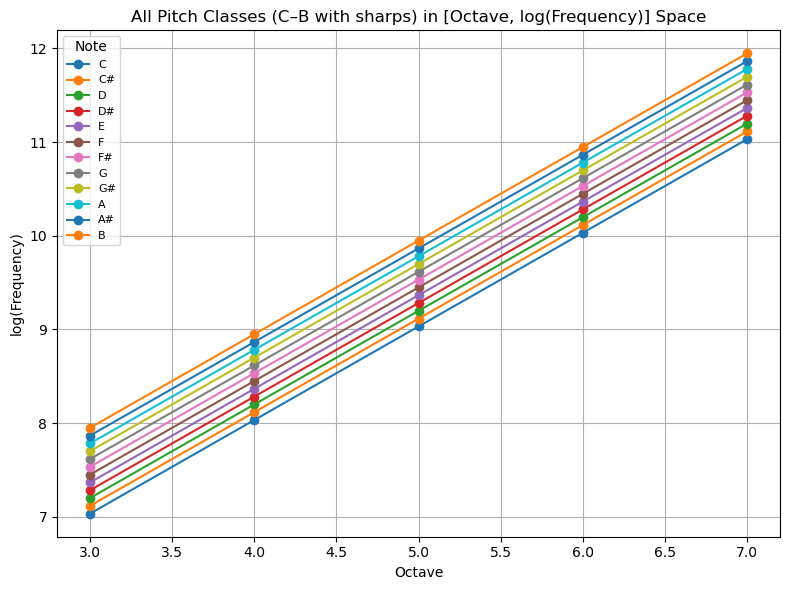

In [8]:
if "NoteName" not in notes.columns or "Octave" not in notes.columns:
    # Assumes combined column is called "Note", like "C#3"
    notes["NoteName"] = notes["Note"].str.extract(r'^([A-G]#?)')
    notes["Octave"]   = notes["Note"].str.extract(r'(-?\d+)$').astype(int)

# --- 2. Ensure we have log(Frequency) column ---

freq_col = None
if "Frequency(Hz)" in notes.columns:
    freq_col = "Frequency(Hz)"
elif "Frequency" in notes.columns:
    freq_col = "Frequency"
else:
    raise ValueError("Could not find frequency column. Expected 'Frequency(Hz)' or 'Frequency'.")

if "log(Frequency)" not in notes.columns:
    notes["log(Frequency)"] = np.log(notes[freq_col])

# --- 3. Define the pitch classes (including sharps) in order ---

pitch_classes = ["C", "C#", "D", "D#", "E", "F",
                 "F#", "G", "G#", "A", "A#", "B"]

# --- 4. Plot each pitch class as a line across octaves ---

plt.figure(figsize=(8, 6))

for name in pitch_classes:
    subset = notes[notes["NoteName"] == name].sort_values(by="Octave")
    if subset.empty:
        continue

    x_vals = subset["Octave"]
    y_vals = subset["log(Frequency)"]

    plt.plot(x_vals, y_vals, marker="o", linestyle="-", label=name)

# --- 5. Styling ---

plt.xlabel("Octave")
plt.ylabel("log(Frequency)")
plt.title("All Pitch Classes (C–B with sharps) in [Octave, log(Frequency)] Space")
plt.grid(True)
plt.legend(title="Note", fontsize=8)
plt.tight_layout()
plt.show()